<a href="https://colab.research.google.com/github/VictoriaOAbel/Analyses/blob/main/Bitcoin_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read Data and Perform Basic Descriptive Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df= pd.read_csv(r'/content/bitcoin_price_Training - Training.csv')

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [7]:
df.shape

(1556, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [10]:
#transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


Doing Data Pre-processing

In [11]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [12]:
# pd.to_datetime()
df['Date'] = df['Date'].astype('datetime64[ns]')

In [13]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [14]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [15]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [16]:
df['Date'][0]

Timestamp('2017-07-31 00:00:00')

In [17]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [21]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [22]:
df.sort_index

<bound method DataFrame.sort_index of            Date     Open     High      Low    Close         Volume  \
0    2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1    2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2    2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3    2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4    2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   
...         ...      ...      ...      ...      ...            ...   
1551 2013-05-02   116.38   125.60    92.28   105.21              -   
1552 2013-05-01   139.00   139.89   107.72   116.99              -   
1553 2013-04-30   144.00   146.93   134.05   139.00              -   
1554 2013-04-29   134.44   147.49   134.00   144.54              -   
1555 2013-04-28   135.30   135.98   132.10   134.21              -   

          Market Cap  
0     45,535,800,000  
1     44,890,700,000  
2     46,246,700,000  
3     44,144,400,000  
4     41,816,500,000  
...              ...  
1551   1,292,190,000  
1552   1,542,820,000  
1553   1,597,780,000  
1554   1,491,160,000  
1555   1,500,520,000  

[1556 rows x 7 columns]>

In [87]:
df.sort_index(ascending=False)

,Open,High,Low,Close,Volume,Market Cap,Close_price_pct_change
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",-4.109427
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",-1.114545
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",3.028113
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",-4.885351
...,...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",7.631714
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",11.196654
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",18.813574


Analysing Change in Price of the Bitcoin overtime

In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

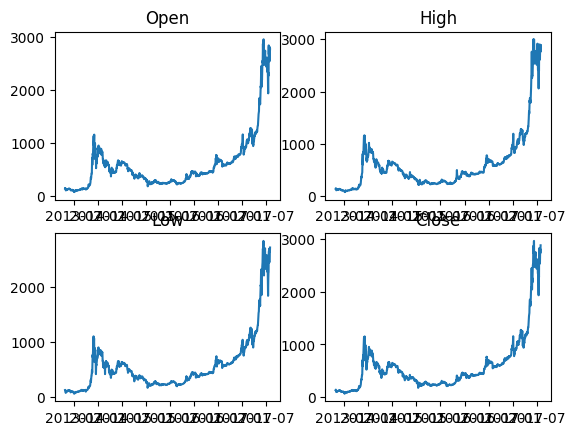

In [29]:
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
  plt.subplot(2,2,index)
  plt.plot(df['Date'], df[col])
  plt.title(col)

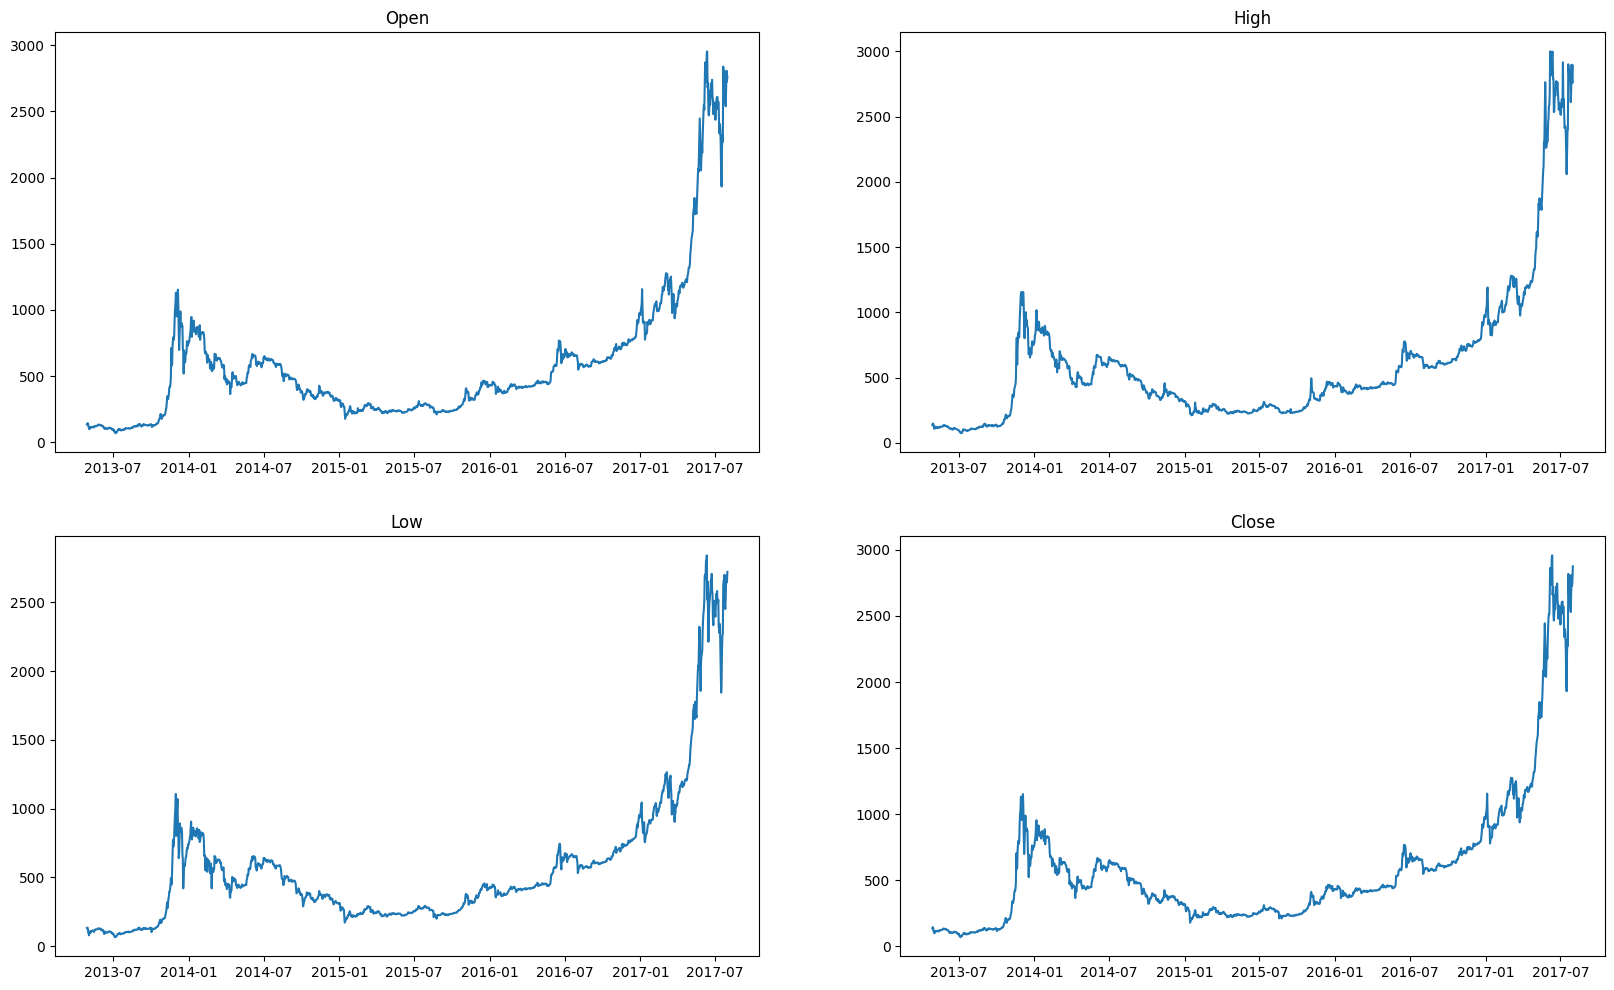

In [30]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
  plt.subplot(2,2,index)
  plt.plot(df['Date'], df[col])
  plt.title(col)

Analysing Bitcoin prices using Candlestick chart

In [31]:
df.shape

(1556, 7)

In [32]:
bitcoin_sample = df[0:50]

In [33]:
!pip install chart_studio
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


In [35]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

# from plotly.offline import download_plotjs, init_notebook_mode, plot, iplot

from plotly.offline import init_notebook_mode, plot, iplot

In [36]:
init_notebook_mode(connected=True)

In [39]:
trace = go.Candlestick(x=bitcoin_sample['Date'],
               open=bitcoin_sample['Open'],
               high=bitcoin_sample['High'],
               low=bitcoin_sample['Low'],
               close=bitcoin_sample['Close'])

In [40]:
candle_data = [trace]

In [41]:
go.Figure(data=candle_data)

In [43]:
candle_data = [trace]

layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title': 'Date'},
}

In [44]:
# To disable slider
fig = go.Figure(data=candle_data)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
#go.Figure(data=[go.Candlestick(x=bitcoin_sample['Date'],
                               #open=bitcoin_sample['Open'],
                               #high=bitcoin_sample['High'],
                               #low=bitcoin_sample['Low'],
                               #close=bitcoin_sample['Close'])])

Analysing Closing Price In-depth

In [46]:
df['Close']

0       2875.34
1       2757.18
2       2726.45
3       2809.01
4       2671.78
         ...   
1551     105.21
1552     116.99
1553     139.00
1554     144.54
1555     134.21
Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

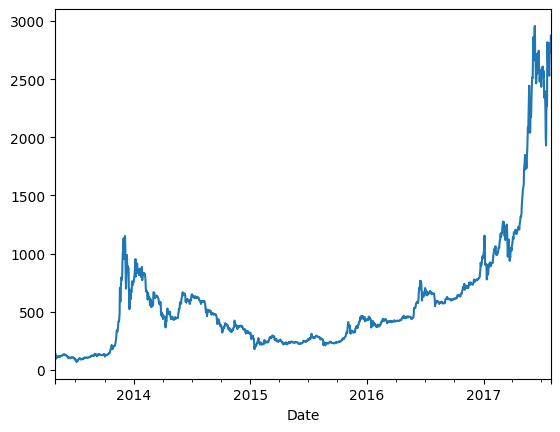

In [49]:
df['Close'].plot()

In [48]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

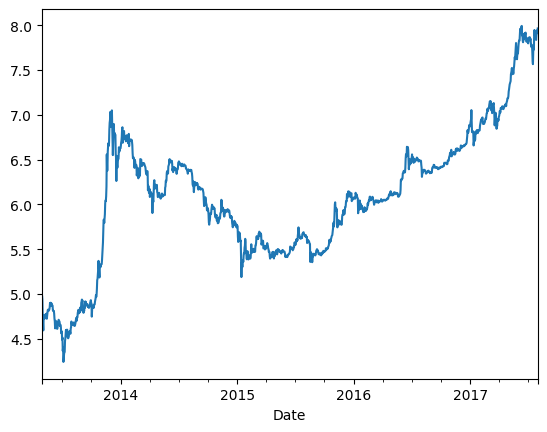

In [52]:
np.log1p(df['Close']).plot()

<ipython-input-56-a5798a632e8e>:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



TypeError: loop of ufunc does not support argument 0 of type Axes which has no callable log1p method

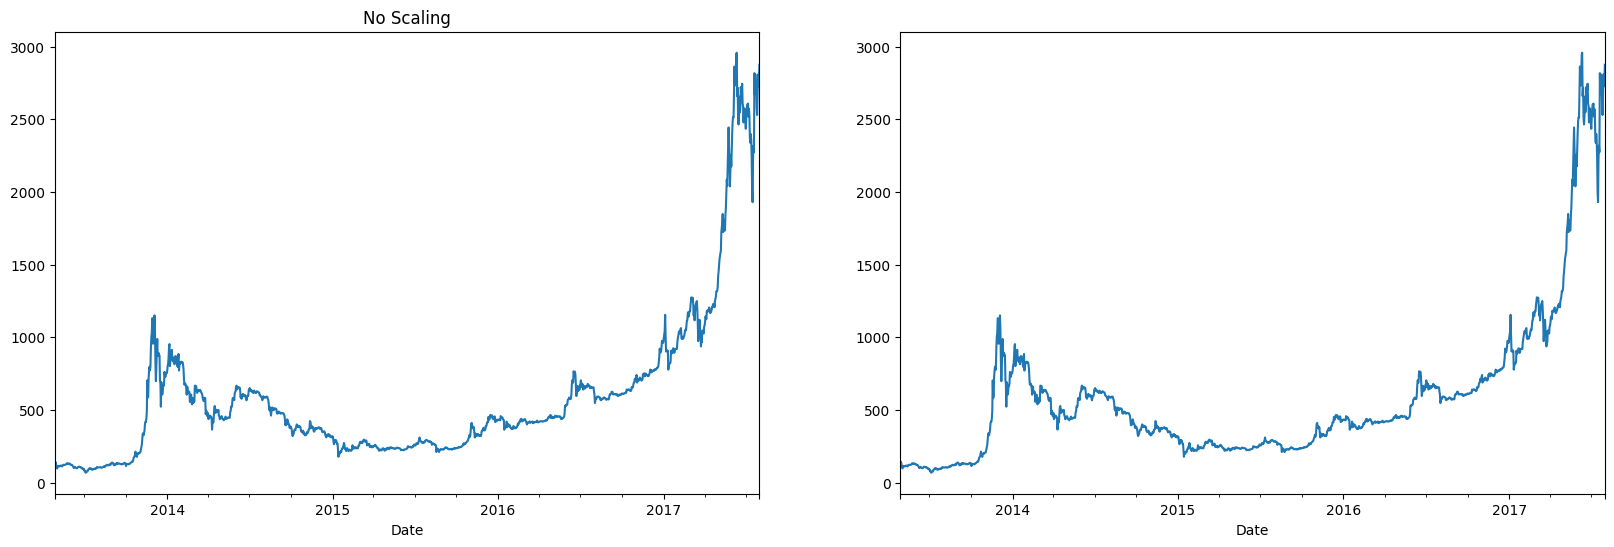

In [56]:
plt.figure (figsize=(20,6))

np.log1p(df['Close']).plot()

plt.subplot(1,2,1)
df['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(df['Close'].plot())
plt.title('Log Scaling')
plt.yscale('Log')

Perform Analysis on Closing Price on Yearly, Quarterly &Monthly Basis

In [57]:
df.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


In [61]:
df['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

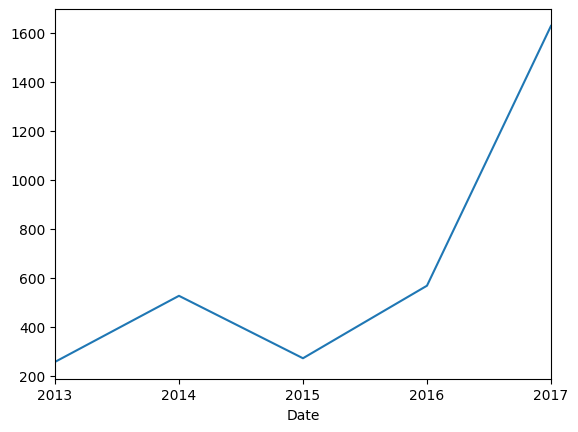

In [62]:
df['Close'].resample('Y').mean().plot()

In [66]:
# Quarterly
df['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

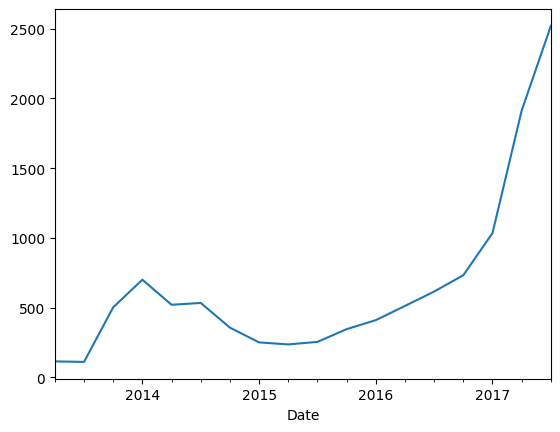

In [63]:
# Quarterly
df['Close'].resample('Q').mean().plot()

In [67]:
#Monthly
df['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

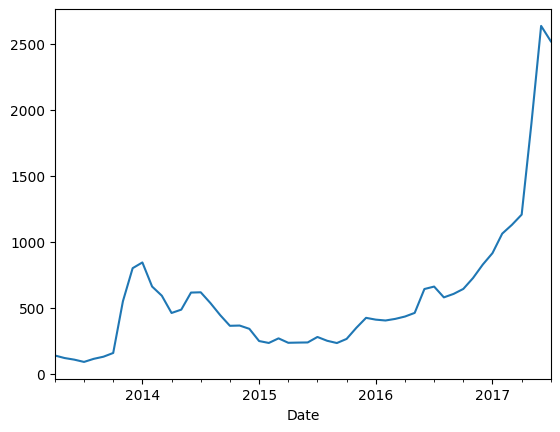

In [64]:
# Monthly
df['Close'].resample('M').mean().plot()

Analysing Daily Change in Closing Price of Stocks

In [69]:
df['Close']

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
               ...   
2013-05-02     105.21
2013-05-01     116.99
2013-04-30     139.00
2013-04-29     144.54
2013-04-28     134.21
Name: Close, Length: 1556, dtype: float64

In [70]:
df['Close'].pct_change()

Date
2017-07-31         NaN
2017-07-30   -0.041094
2017-07-29   -0.011145
2017-07-28    0.030281
2017-07-27   -0.048854
                ...   
2013-05-02    0.076317
2013-05-01    0.111967
2013-04-30    0.188136
2013-04-29    0.039856
2013-04-28   -0.071468
Name: Close, Length: 1556, dtype: float64

In [71]:
df['Close'].pct_change()*100

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close, Length: 1556, dtype: float64

In [72]:
df['Close_price_pct_change'] = df['Close'].pct_change()*100

In [73]:
df['Close_price_pct_change']

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

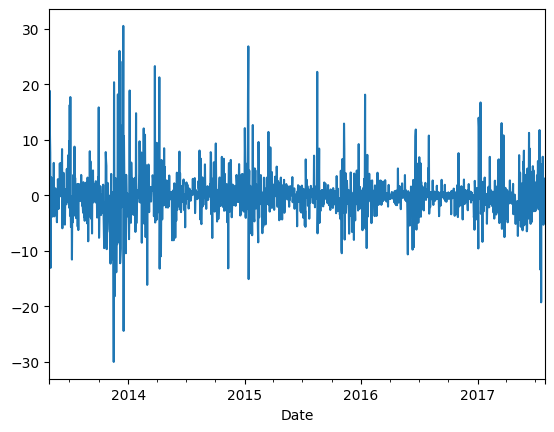

In [75]:
df['Close_price_pct_change'].plot()

In [77]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [78]:
import cufflinks as cf

In [81]:
cf.go_offline()

In [82]:
df['Close_price_pct_change']

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [83]:
type(df['Close_price_pct_change'])

pandas.core.series.Series

In [84]:
df['Close_price_pct_change'].iplot()